# Final

Estudiante: Felipe Alvarez Jaramillo

## Importar Liberías

In [1]:
# Silent warnings
import warnings
warnings.filterwarnings("ignore")

# Core
import numpy as np
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

# Data
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

## Solución

In [2]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploración de datos

In [3]:
# Ver cantidad de registros del Dataframe
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Se tienen 9 columnas y 768 filas. Ninguna de las columnas tiene valores nulos.

Por este motivo no es necesario hacer ningún cambio al Dataframe en cuanto a tratamiento de valores nulos.

Adicional, todas las columnas representan variables númericas, no variables cátegoricas.

In [4]:
# Ver el resumen estadistico de las variables
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Por medio del método describe se genera un resumen estadístico de las variables no categoricas con el fin de evidenciar como se distribuyen. Para esto también es ideal hacer un histograma para cada variable

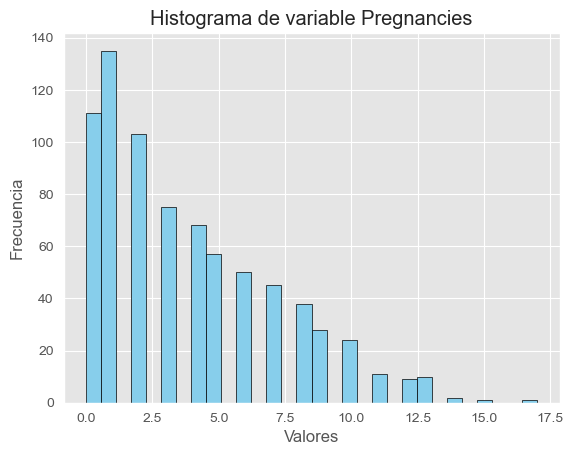

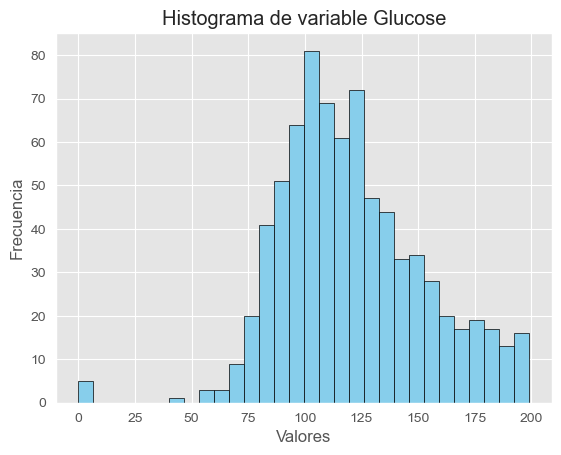

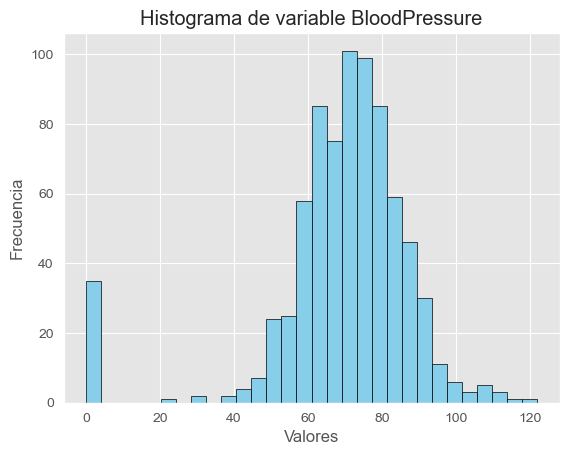

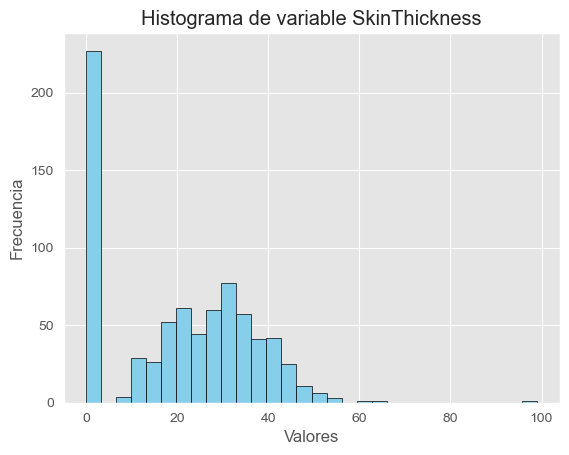

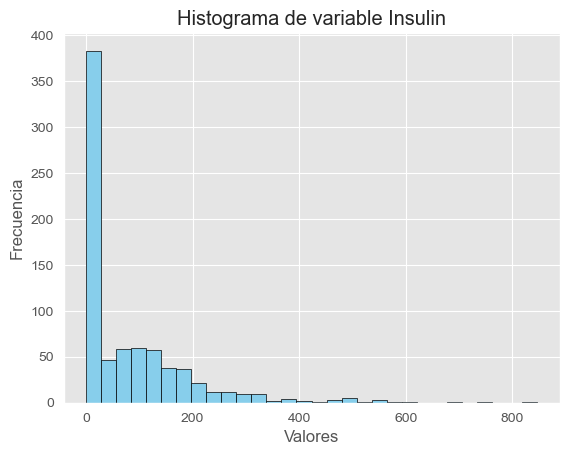

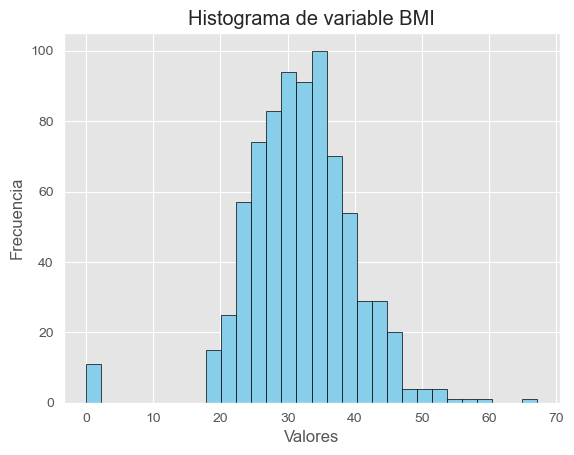

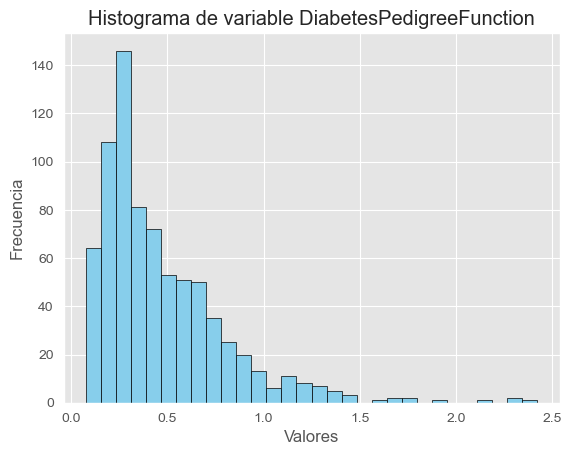

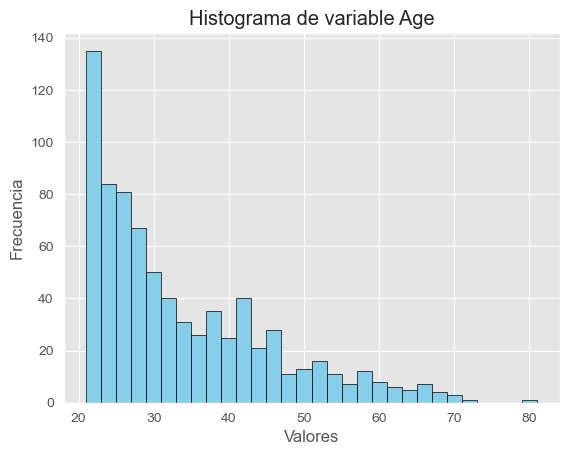

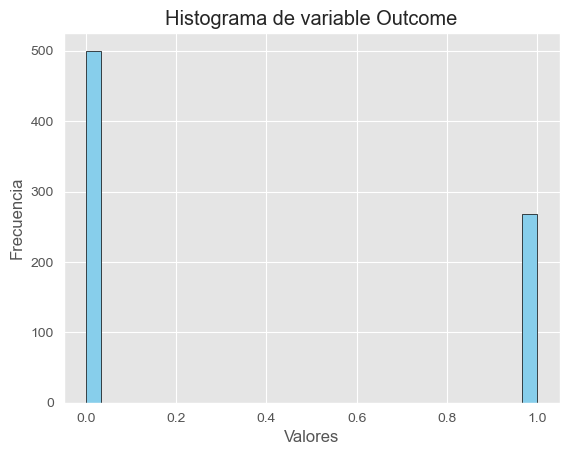

In [5]:
# Se realiza un ciclo for para generar un histograma por cada una de las variables no categoricas.

for col in df_diabetes.columns:
    # Crear el histograma
    plt.hist(df_diabetes[col], bins=30, color='skyblue', edgecolor='black')  
    plt.title(f"Histograma de variable {col}")
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.show()

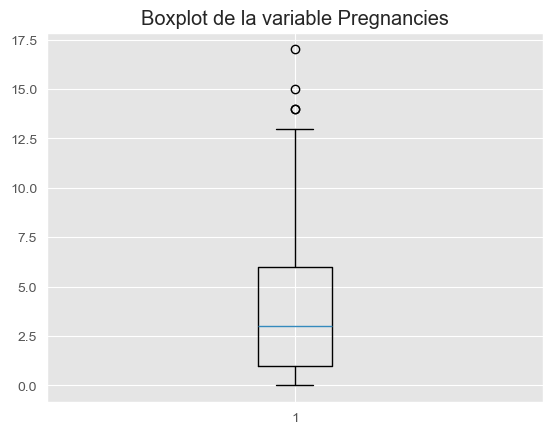

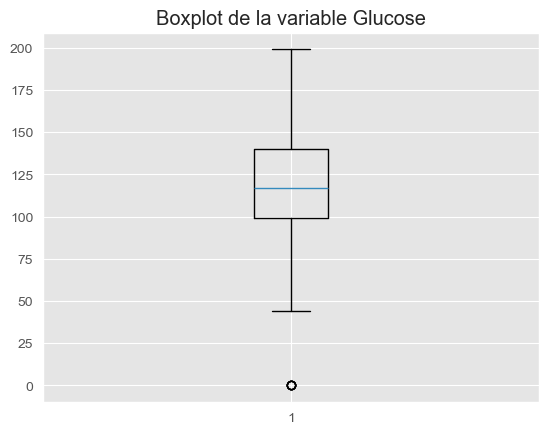

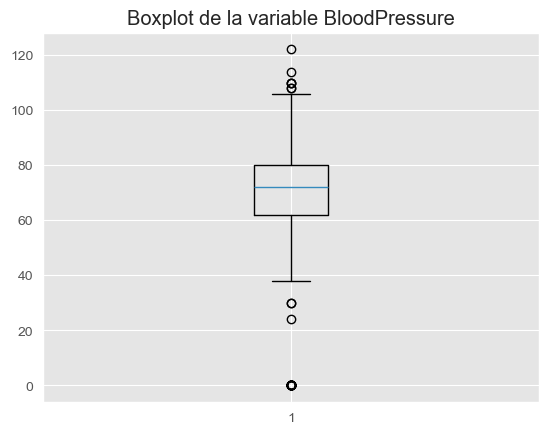

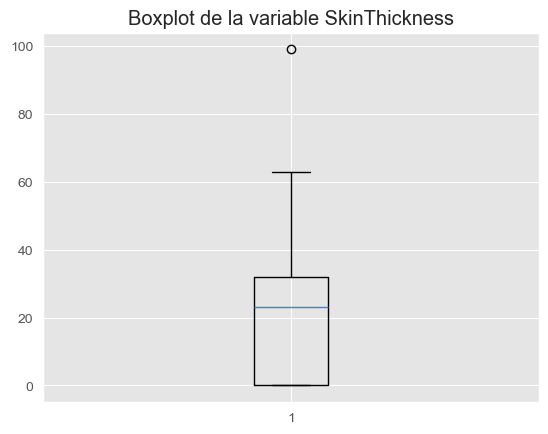

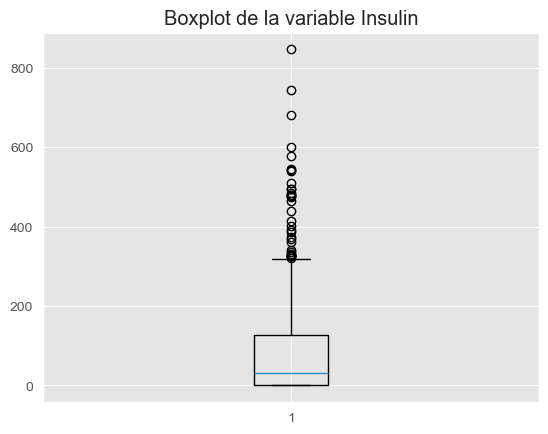

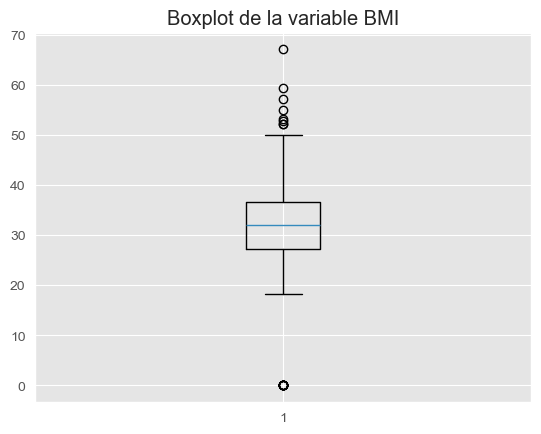

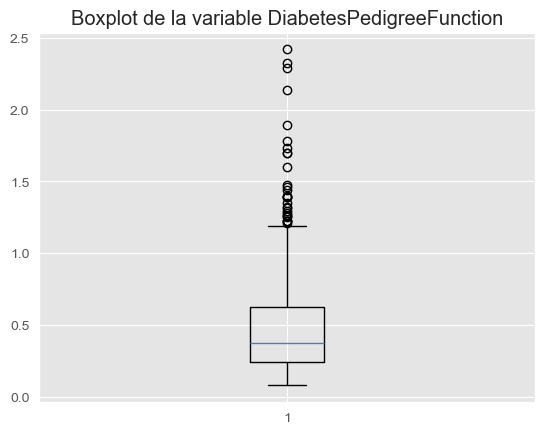

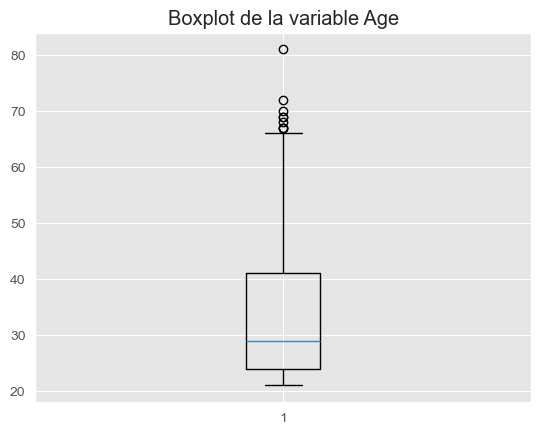

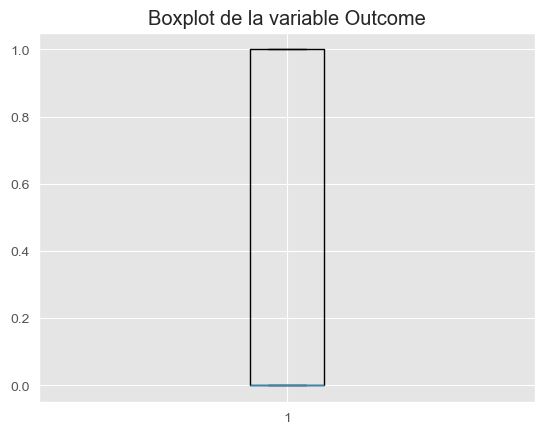

In [6]:
# También se puede hacer un Boxplot para evidenciar :
for col in df_diabetes.columns:
    # Crear un boxplot
    plt.boxplot(df_diabetes[col])  
    plt.title(f"Boxplot de la variable {col}")
    plt.show()

In [7]:
# Ver distribución de la variable dependiente
df = df_diabetes['Outcome'].value_counts().sort_index()
df

Outcome
0    500
1    268
Name: count, dtype: int64

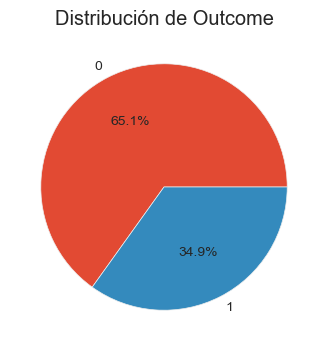

In [8]:
# Ver distribución de la variable:
plt.figure(figsize=(4, 4))  # Tamaño del gráfico
plt.pie(df, labels=df.index, autopct='%1.1f%%')
plt.title(f"Distribución de Outcome")  
plt.show()

Se evidencia que dentro del dataframe hay más casos de personas sin diabetes (65.1%) que personas con diabetes (34.9%), esto hace que sea necesario balancear la variable Outcome para trabajar en el modelo.

In [9]:
# Matriz de correlaciones:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


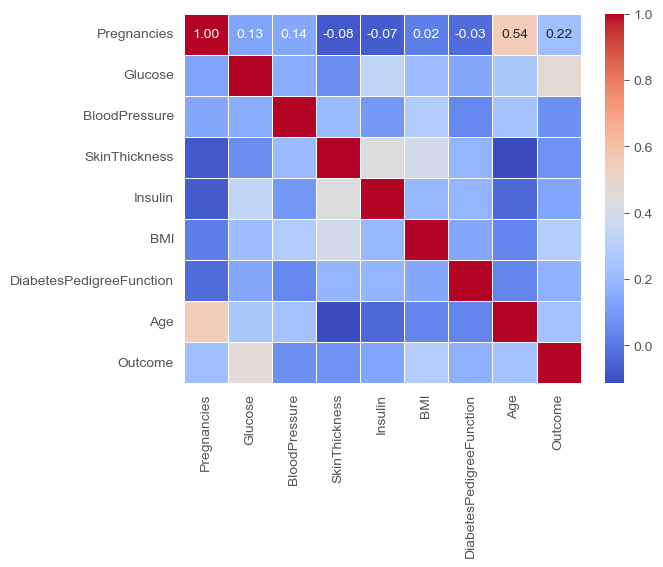

In [10]:
# Realizar un mapa de calor para tener una visual de las correlaciones entre las variables.
sns.heatmap(df_diabetes.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)
plt.show()

Por medio de la matriz de correlaciones podemos evidenciar que la variable con mayor correlación frente a la variable Outcome es la glucosa. Si se tiene la glucosa alta, mayor probabilidad de tener diabetes. 

Adicional, se evidencia que hay dos variables con una correlación muy baja respecto a nuestra variable dependiente, estás variables son: BloodPressure con una corrlación de 0.065068 y SkinThickness con una correlación de 0.074752; estos valores tan bajos las vuelven candidatas para no ser tenidas en cuenta dentro de los modelos.

De la matriz podemos ver también que se evidencian muy pocas correlaciones negativas entre todas las variables.

## Preparación de Datos:

In [11]:
# Balancear variable de salida, incremento_ingresos:

#Balanceo de y
df_diabetes_no = df_diabetes[df_diabetes['Outcome'] == 0]
df_diabetes_si = df_diabetes[df_diabetes['Outcome'] == 1]

print(f'''      
Tamaño DF personas sin diabetes {df_diabetes_no.shape}
Tamaño DF personas con diabetes {df_diabetes_si.shape}
''')

      
Tamaño DF personas sin diabetes (500, 9)
Tamaño DF personas con diabetes (268, 9)



In [12]:
df_diabetes_no_bal = df_diabetes_no.sample(df_diabetes_si.shape[0], replace=True)
df_diabetes_bal = pd.concat([df_diabetes_no_bal, df_diabetes_si])
df_diabetes_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 501 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               536 non-null    int64  
 1   Glucose                   536 non-null    int64  
 2   BloodPressure             536 non-null    int64  
 3   SkinThickness             536 non-null    int64  
 4   Insulin                   536 non-null    int64  
 5   BMI                       536 non-null    float64
 6   DiabetesPedigreeFunction  536 non-null    float64
 7   Age                       536 non-null    int64  
 8   Outcome                   536 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 41.9 KB


Pasamos a tener 536 registros, donde la mitad (268) corresponden a personas sin diabetes y la otra mitad a personas con diabetes

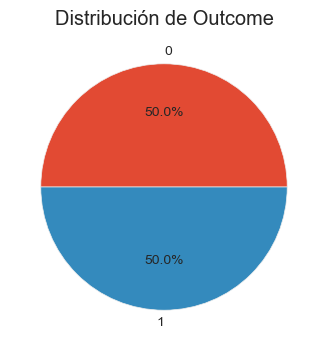

In [13]:
# Ver distribución de la variable:
df = df_diabetes_bal['Outcome'].value_counts().sort_index()
plt.figure(figsize=(4, 4))  # Tamaño del gráfico
plt.pie(df, labels=df.index, autopct='%1.1f%%')
plt.title(f"Distribución de Outcome")  
plt.show()

In [14]:
# Variables independientes en matrix X y variable dependiente en Y

X = df_diabetes_bal.drop('Outcome', axis = 1)
y = df_diabetes_bal[['Outcome']]


In [15]:
# Normalizar las variables númericas:
from sklearn.preprocessing import MinMaxScaler

#Inicializar el escalador
scaler = MinMaxScaler()

#Normalizar los datos: es decir, llevar las variables a valores de 0 a 1.
X_pro = scaler.fit_transform(X)

#Mostrar los registros normalizados
X[X.columns] = X_pro
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
501,0.176471,0.422111,0.631579,0.323232,0.000000,0.554396,0.077944,0.116667
76,0.411765,0.311558,0.684211,0.000000,0.000000,0.485842,0.131049,0.333333
176,0.352941,0.427136,0.684211,0.000000,0.000000,0.464978,0.127195,0.350000
141,0.294118,0.532663,0.719298,0.303030,0.000000,0.588674,0.086081,0.283333
482,0.235294,0.427136,0.508772,0.222222,0.057920,0.414307,0.094647,0.116667
...,...,...,...,...,...,...,...,...
755,0.058824,0.643216,0.771930,0.393939,0.130024,0.543964,0.416274,0.266667
757,0.000000,0.618090,0.631579,0.000000,0.000000,0.540984,0.074090,0.516667
759,0.352941,0.954774,0.807018,0.000000,0.000000,0.529061,0.082655,0.750000
761,0.529412,0.854271,0.649123,0.313131,0.000000,0.655738,0.136188,0.366667


## Modelamiento y Evaluación de los Datos

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Definir datos de entrenamiento y de validación.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Modelo de Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_reg_log = LogisticRegression()

In [18]:
# Realizar validación cruzada en los datos de entrenamiento
cv_scores_train = cross_val_score(modelo_reg_log, X_train, y_train, cv=5, scoring='accuracy')

In [19]:
# Resultados de la validación cruzada: 
print("Puntajes de validación cruzada (accuracy):", cv_scores_train)
print("Promedio de validación cruzada:", np.mean(cv_scores_train))

Puntajes de validación cruzada (accuracy): [0.68       0.8        0.70666667 0.69333333 0.76      ]
Promedio de validación cruzada: 0.728


Utilizando la validación cruzada, donde lo que se pretende es entrenar el modelo con diferentes selecciones de los datos de entrenamiento, podemos ver que la precisión del modelo si varía un poco según los datos que se seleccionen. Y como podemos ver, el promedio de la precisión fue de 79.2%

In [20]:
# Entrenar el modelo
modelo_reg_log.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Los coeficientes W del modelo:
modelo_reg_log.coef_

array([[ 1.71022   ,  4.17584391, -0.47306452,  0.45651029,  0.31901593,
         2.00056568,  1.3134785 ,  0.79752541]])

In [22]:
# El intercepto del modelo:
modelo_reg_log.intercept_

array([-4.33666482])

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       192
           1       0.77      0.69      0.73       183

    accuracy                           0.75       375
   macro avg       0.75      0.75      0.75       375
weighted avg       0.75      0.75      0.75       375



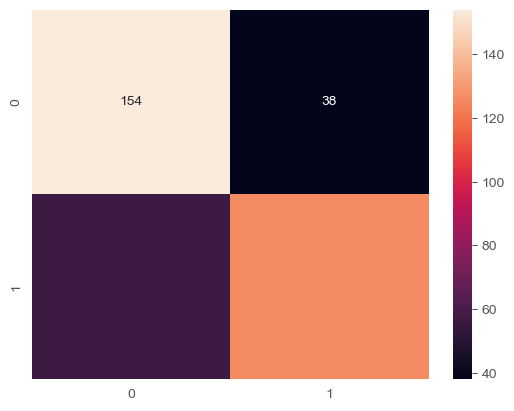

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_train = modelo_reg_log.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(data = cm_train, annot = True, fmt = 'd')
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        76
           1       0.81      0.69      0.75        85

    accuracy                           0.75       161
   macro avg       0.76      0.75      0.75       161
weighted avg       0.76      0.75      0.75       161



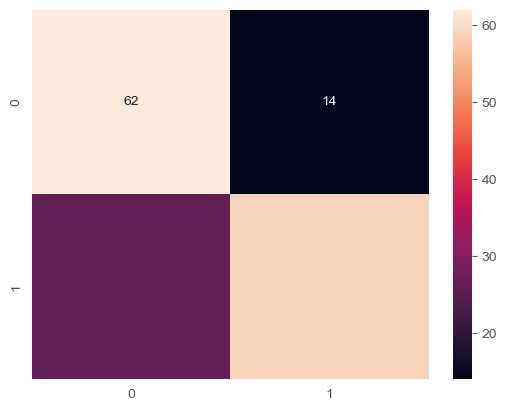

In [24]:
y_pred_test = modelo_reg_log.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(data=cm_test, annot=True, fmt='d')
print(classification_report(y_test, y_pred_test))

Para el modelo de regresión en este caso tuvo una accuracy de 0.75 para datos de entrenamiento y de 0.75 para datos de validación. 

Adicional, es importante mencionar que tuvo una precisión 0.81 y un recall de 0.69 para datos de validación. Esto puede ser un problema ya el objetivo del modelo es detectar los casos con diabetes y al tener un recall bajo de 0.69, lo que quiere decir que hay una alta cantidad de falsos negativos; lo que en este caso serían personas con diabetes a las que se les dice que no tienen la enfermedad.

### Modelo de Support Vector Machines para clasificación

In [25]:
from sklearn.svm import SVC

modelo_svc = SVC()

In [26]:
modelo_svc.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       192
           1       0.82      0.73      0.77       183

    accuracy                           0.79       375
   macro avg       0.80      0.79      0.79       375
weighted avg       0.79      0.79      0.79       375



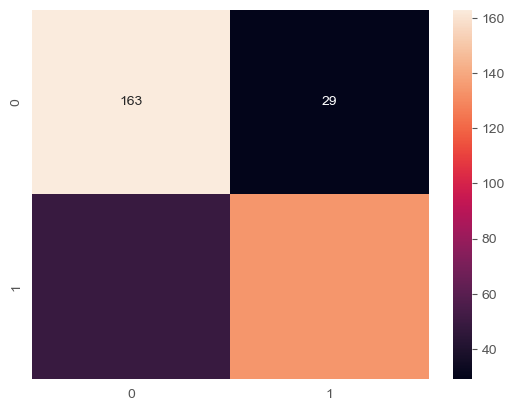

In [27]:
y_pred_train = modelo_svc.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(data = cm_train, annot = True, fmt = 'd')
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        76
           1       0.82      0.69      0.75        85

    accuracy                           0.76       161
   macro avg       0.76      0.76      0.76       161
weighted avg       0.77      0.76      0.76       161



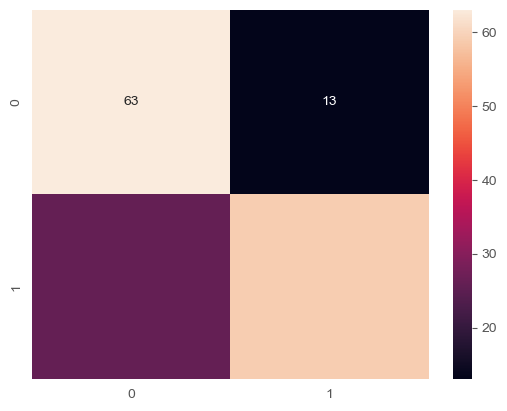

In [28]:
y_pred_test = modelo_svc.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(data=cm_test, annot=True, fmt='d')
print(classification_report(y_test, y_pred_test))

### Modelo Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=200, random_state=1)

In [37]:
# Realizar validación cruzada en los datos de entrenamiento para el modelo de Random Forest.
cv_scores_rf = cross_val_score(modelo_rf, X_train, y_train, cv=5, scoring='accuracy')

In [38]:
# Resultados de la validación cruzada: 
print("Puntajes de validación cruzada (accuracy):", cv_scores_rf)
print("Promedio de validación cruzada:", np.mean(cv_scores_rf))

Puntajes de validación cruzada (accuracy): [0.68       0.82666667 0.77333333 0.74666667 0.82666667]
Promedio de validación cruzada: 0.7706666666666667


Luego de la validación cruzada se evidencia que el modelo tiene un acurracy promedio de 0.77

In [39]:
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [40]:
y_pred_train = modelo_rf.predict(X_train)
y_pred_test = modelo_rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       183

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



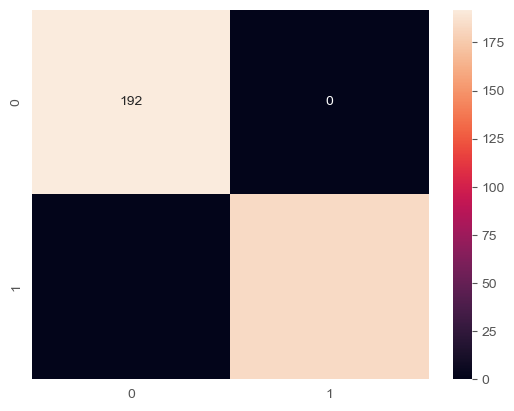

In [41]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(data=cm_train, annot=True, fmt='d')
print(classification_report(y_train, y_pred_train))

Para los datos de entrenamiento, el modelo de Random Forest tiene un accurracy de 1, lo cual es un claro indicador de sobreajuste del modelo, es decir, el modelo se aprendió los datos de entrenamiento y lo replico para la predicción de los valores.

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        76
           1       0.83      0.74      0.78        85

    accuracy                           0.78       161
   macro avg       0.79      0.79      0.78       161
weighted avg       0.79      0.78      0.78       161



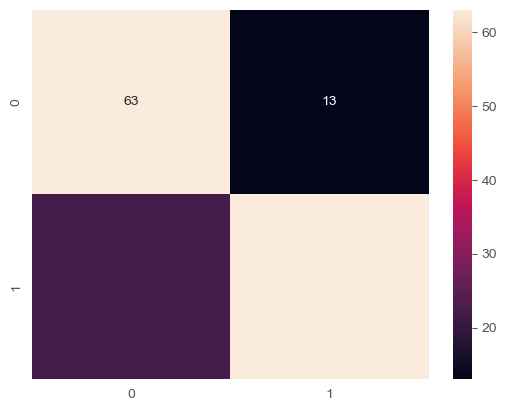

In [42]:
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(data=cm_test, annot=True, fmt='d')
print(classification_report(y_test, y_pred_test))

Podemos ver también que ocurrió un sobreajuste puesto que el accuracy para los datos de validación fue mucho menor, de 0.78.

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades de la clase positiva
y_prob = modelo_rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_prob)

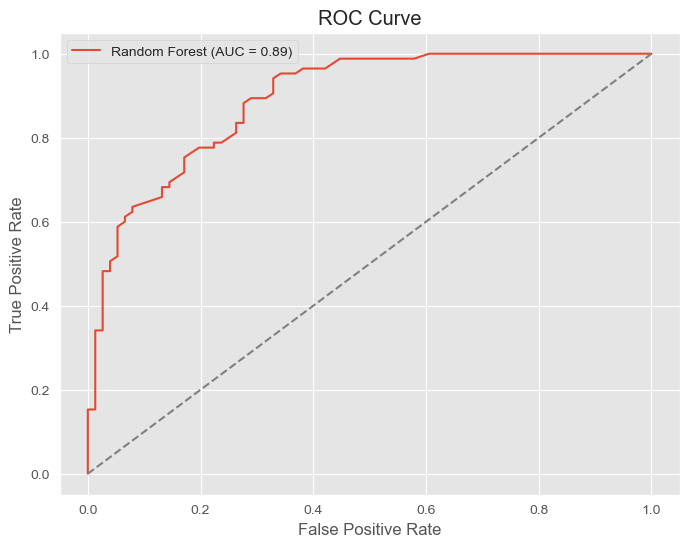

In [44]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [45]:
# Obtener las importancias de las características
importances = modelo_rf.feature_importances_

# Crear un DataFrame para organizar las características y su importancia
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                    Feature  Importance
1                   Glucose    0.275253
7                       Age    0.152187
5                       BMI    0.143329
6  DiabetesPedigreeFunction    0.116797
0               Pregnancies    0.084607
2             BloodPressure    0.081440
4                   Insulin    0.078917
3             SkinThickness    0.067470


Por último utilizamos la importancia de características del modelo de Random Forest para validar cual fue el peso que se le dio a cada una de las variables con el fin de predecir si el paciente tenía diabetes o no. Según esto, podemos ver que las variables más importantes para determinar esto fueron el nivel de glucosa con un 27.52%, la edad con un 15.21% y el BMI con un 14.33%

## Fin